# DS 3000 - Assignment [TODO: enter assignment number]

**Student Name**: [TODO: Enter your name here]

**Date**: [TODO: Enter the date]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

In your own words, formulate the Data Science problem that you were given.


The dataset that we have been given has information from the Bureau of Transportation Statistics which has flight performance data for airlines operating in Arizona, Nevada, and California. Our main focus is on flight delays and air traffic patterns. We want to determine which airports have the higheset volume of flights, find peak travel times, and the most common flight routes.
1. Understand Air Traffic Patterns:
- Analyze flight frequency and distribution across different airports and regions.
- Identify the busiest airports and peak travel times.
- Look for differences in air traffic based on route, season, and airline.
2. Understand Airline Performance that have delays:
- Find out which airlines are most prone to delays.
- See if certain airports have more delays than others.
- Look for trends in departure and arrival delays across different times, days, and months.
- Check if there are any factors that lead to flight delays (distance, departure time, weather conditions, number of flights in and out)

The problem that we have is about exploratory data analysis as well as inferential analytics to identify trends, relationships, and potential factors that are behind flight delays. The results that we get can give insights to airlines, airport authorities, and passengers to help improve flight operations and help when planning for traveling."

## Question 2: 
1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
3. At a high level, provide an overview of the dataset; prepare summary statistics and at least three visualizations to support your explanation. Note: the explanation and visualizations should be relevant to the DS Problem in question 1.


In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("2019_ONTIME_REPORTING_FSW.csv")

In [4]:
#before changing types to see what they are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   FL_DATE       1048575 non-null  object 
 1   CARRIER_CODE  1048575 non-null  object 
 2   TAIL_NUM      1045459 non-null  object 
 3   FL_NUM        1048575 non-null  int64  
 4   ORIGIN        1048575 non-null  object 
 5   ORIGIN_ST     1048575 non-null  object 
 6   DEST          1048575 non-null  object 
 7   DEST_ST       1048575 non-null  object 
 8   DEP_TIME      1032926 non-null  float64
 9   DEP_DELAY     1032920 non-null  float64
 10  ARR_TIME      1032036 non-null  float64
 11  ARR_DELAY     1030216 non-null  float64
 12  ELAPSED_TIME  1030216 non-null  float64
 13  DISTANCE      1048575 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 112.0+ MB


In [6]:
#changed fl_date to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], format='%m/%d/%y')

#changed fl_num to a string
df['FL_NUM'] = df['FL_NUM'].astype(str)

#changed dep_time and arr_time to string
df['DEP_TIME'] = df['DEP_TIME'].dropna().astype(int).astype(str).str.zfill(4)
df['ARR_TIME'] = df['ARR_TIME'].dropna().astype(int).astype(str).str.zfill(4)

#make sure the types are changed
df.dtypes

FL_DATE         datetime64[ns]
CARRIER_CODE            object
TAIL_NUM                object
FL_NUM                  object
ORIGIN                  object
ORIGIN_ST               object
DEST                    object
DEST_ST                 object
DEP_TIME                object
DEP_DELAY              float64
ARR_TIME                object
ARR_DELAY              float64
ELAPSED_TIME           float64
DISTANCE                 int64
dtype: object

# Explanation for changing types:
1. Converted FL_DATE to datetime
- Storing dates as datetime makes it easier for filtering, grouping, and analysis.
2. Converted FL_NUM to a string(object)
- Flight numbers are identifiers and aren't used in calcuations
3. Converted DEP_TIME and ARR_TIME to string(object)
- They represent time in an HH:MM format rather than numbers
4. Did not change DEP_DELAY, ARR_DELAY, ELAPSED_TIME or DISTANCE

In [19]:
#fill missing tail numbers with unknown
df['TAIL_NUM'] = df['TAIL_NUM'].fillna('Unknown')

#fill missing dep_depay and arr_depay with 0. I am assuming that there isn't any recorded delay
df['DEP_DELAY'].fillna(0)
df['ARR_DELAY'].fillna(0)

#estimate missing elapsed_time using avg speed of 500 mph
df['ELAPSED_TIME'].fillna((df['DISTANCE']/500) * 60)

#missing times could mean the flight was cancelled
df['CANCELED'] = df['DEP_TIME'].isnull() 


#check if missing values are being handled
print(df.isnull().sum())

FL_DATE             0
CARRIER_CODE        0
TAIL_NUM            0
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DEP_TIME        15649
DEP_DELAY           0
ARR_TIME        16539
ARR_DELAY           0
ELAPSED_TIME        0
DISTANCE            0
dtype: int64


# Explanation for data preperation steps:
Handling Missing Values:
To handle missing values in columns TAIL_NUM, DEP_TIME, ARR_TIME, DEP_DELAY, ARR_DELAY, ELAPSED_TIME, we filled TAIL_NUM with "Unknown" since we can't infer missing values to show that is has missing data without actually removing it. For DEP_TIME and ARR_TIME, a missing dep or arr time most likley means that the flight was cancelled so we shouln't guess or fill in incorrect values. For DEP_DELAY and ARR_DELAY, we assume that there was no delay rather than leaving it empty. For ELAPSED_TIME we estimate the missing values based on distance and the fact that flight typically fly at 500 mph.

Handling Invalid Values:
DEP_DELAY and ARR_DELAY should not be negative, since a flight can't leave before it was scheduled.
While delays can be long, values that are above 1,000 minutes or 16+ hours should be checked for potential errors.
If ELAPSED_TIME is too short or too long for the given distance, it might be an error.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

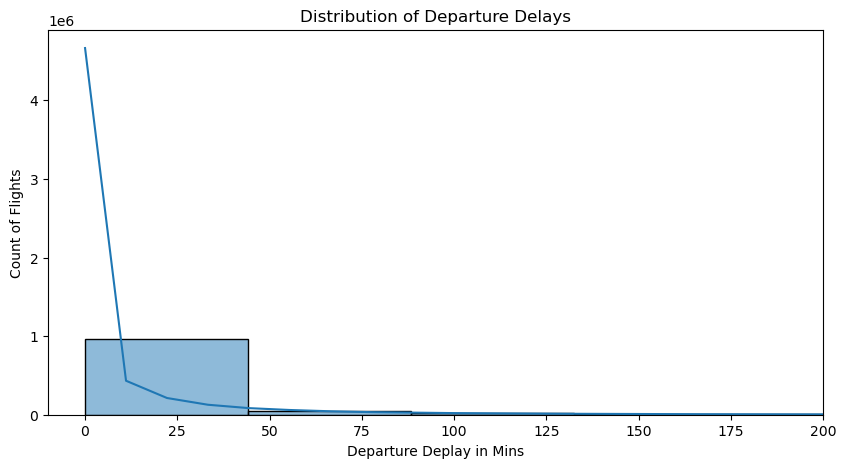


Departure delays allows us to paint a picture around airline performance.
We found that most flights have small or no delays but a small amount experience
extreme delays. 



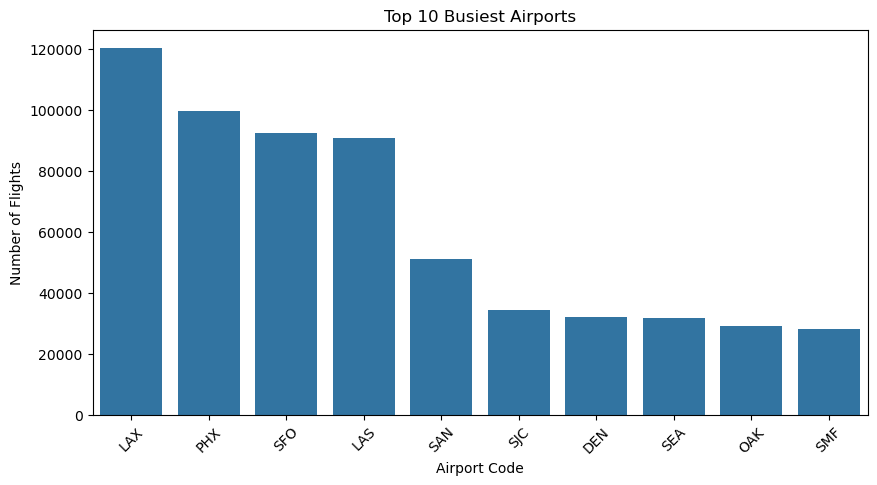


Understanding air traffic patterns helps us identify which airports have the most congestion.
A few airports handle the majority of flights which means that they also could have more 
delays because of the high traffic volume.



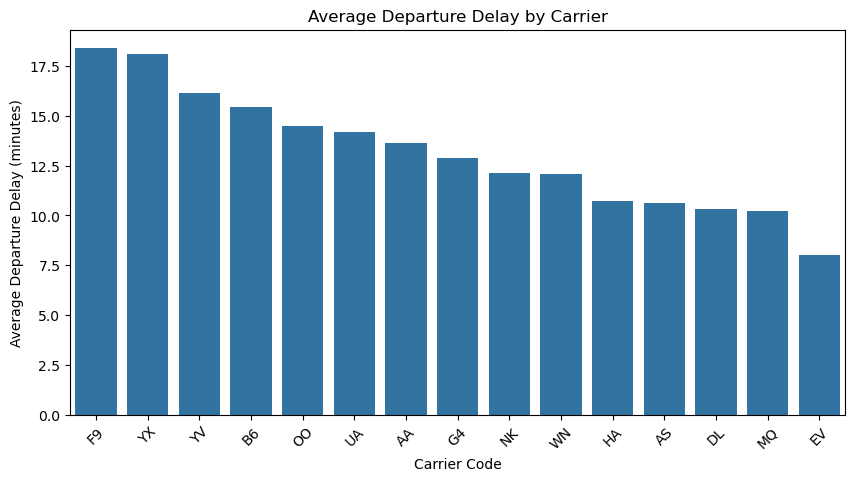


Some airlines are more pront to delays than others and we found that certain airlines have
higher than average departure delays which could mean that there is congestion at the hubs
or even inefficient operations.

        DEP_DELAY   ARR_DELAY  ELAPSED_TIME    DISTANCE
count 1048575.000 1048575.000   1048575.000 1048575.000
mean       12.930      12.480       174.080    1141.430
std        43.400      42.790        93.310     753.580
min         0.000       0.000         7.920      66.000
25%         0.000       0.000        93.000     447.000
50%         0.000       0.000       152.000     954.000
75%         8.000       7.000       243.000    1744.000
max      2209.000    2206.000       538.000    2979.000


In [31]:
summary_stats = df.describe()

#1: Distribution of Departure Delays
plt.figure(figsize=(10, 5))
sns.histplot(df['DEP_DELAY'], bins=50, kde=True)
plt.xlim(-10, 200)
plt.xlabel("Departure Deplay in Mins")
plt.ylabel("Count of Flights")
plt.title("Distribution of Departure Delays")
plt.show()

print("""
Departure delays allows us to paint a picture around airline performance.
We found that most flights have small or no delays but a small amount experience
extreme delays. 
""")

#2: Top 10 Busiest Airports by Flight Count
top_airports = df['ORIGIN'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_airports.index, y=top_airports.values)
plt.xlabel("Airport Code")
plt.ylabel("Number of Flights")
plt.title("Top 10 Busiest Airports")
plt.xticks(rotation=45)
plt.show()

print("""
Understanding air traffic patterns helps us identify which airports have the most congestion.
A few airports handle the majority of flights which means that they also could have more 
delays because of the high traffic volume.
""")

#3: Average Delay by Carrier
avg_delay_by_carrier = df.groupby('CARRIER_CODE')['DEP_DELAY'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_delay_by_carrier.index, y=avg_delay_by_carrier.values)
plt.xlabel("Carrier Code")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay by Carrier")
plt.xticks(rotation=45)
plt.show()

print("""
Some airlines are more pront to delays than others and we found that certain airlines have
higher than average departure delays which could mean that there is congestion at the hubs
or even inefficient operations.
""")

pd.options.display.float_format = '{:.3f}'.format
print(df[['DEP_DELAY', 'ARR_DELAY', 'ELAPSED_TIME', 'DISTANCE']].describe().round(2))


# Summary: 
We computed the summary statistics and found that the avg departure delay is about 13 mins, avg arrival delay is about 12.5 mins, the avg flight distance is about 1,141 miles, and the departure delays distribution is right skewed meaning that most flights have minor delays while some experience major delays.

# Question 3:
1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
3. At a high level, provide an overview of the dataset; prepare summary statistics and at least three visualizations to support your explanation. Note: the explanation and visualizations should be relevant to the DS Problem in question 1.

# Question 4:
1. Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
2. Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.

In [7]:
import pandas as pd
file_path = r"C:\Users\33735\Desktop\CS4530\2019_ONTIME_REPORTING_FSW.csv"
df = pd.read_csv(file_path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB


,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])
df["DEP_DELAY"] = df["DEP_DELAY"].apply(lambda x: max(x, 0)) 
df["ARR_DELAY"] = df["ARR_DELAY"].apply(lambda x: max(x, 0))
df.info()

Missing values per column:
 FL_DATE             0
CARRIER_CODE        0
TAIL_NUM         4791
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DEP_TIME        26707
DEP_DELAY       26715
ARR_TIME        28244
ARR_DELAY       31884
ELAPSED_TIME    31884
DISTANCE            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   FL_DATE       datetime64[ns]
 1   CARRIER_CODE  object        
 2   TAIL_NUM      object        
 3   FL_NUM        int64         
 4   ORIGIN        object        
 5   ORIGIN_ST     object        
 6   DEST          object        
 7   DEST_ST       object        
 8   DEP_TIME      float64       
 9   DEP_DELAY     float64       
 10  ARR_TIME      float64       
 11  ARR_DELAY     float64       
 12  ELAPSED_TIME  float64       
 13  DISTANCE      int64    

In [9]:
# Group by carrier and calculate min, max, and average delays
carrier_delays = df.groupby("CARRIER_CODE")[["DEP_DELAY", "ARR_DELAY"]].agg(["min", "max", "mean"])
carrier_delays.columns = ["_".join(col) for col in carrier_delays.columns] 
carrier_delays = carrier_delays.reset_index()
top_carriers = carrier_delays.sort_values(by="DEP_DELAY_mean", ascending=False).head(10)
print(top_carriers)

   CARRIER_CODE  DEP_DELAY_min  DEP_DELAY_max  DEP_DELAY_mean  ARR_DELAY_min  \
5            F9            0.0          711.0       20.040657            0.0   
14           YX            0.0          500.0       18.629870            0.0   
2            B6            0.0         1769.0       16.594516            0.0   
11           UA            0.0         1515.0       15.495850            0.0   
13           YV            0.0         2209.0       15.468412            0.0   
0            AA            0.0         2315.0       14.688518            0.0   
10           OO            0.0         1912.0       14.457130            0.0   
6            G4            0.0         1540.0       13.167740            0.0   
9            NK            0.0         1434.0       13.054907            0.0   
4            EV            0.0          164.0       11.627660            0.0   

    ARR_DELAY_max  ARR_DELAY_mean  
5           695.0       19.000000  
14          481.0       18.363636  
2          

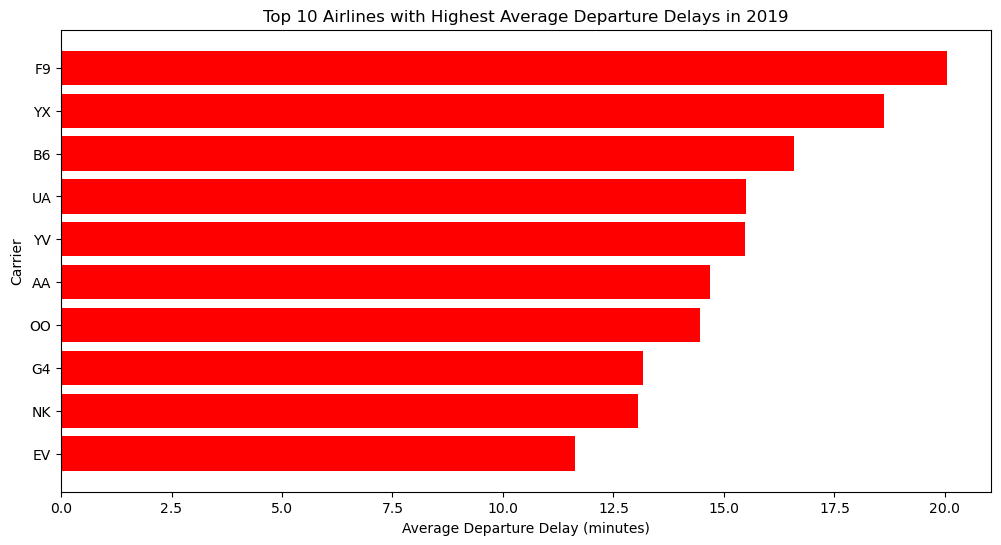

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.barh(top_carriers["CARRIER_CODE"], top_carriers["DEP_DELAY_mean"], color="red")
plt.xlabel("Average Departure Delay (minutes)")
plt.ylabel("Carrier")
plt.title("Top 10 Airlines with Highest Average Departure Delays in 2019")
plt.gca().invert_yaxis() 
plt.show()

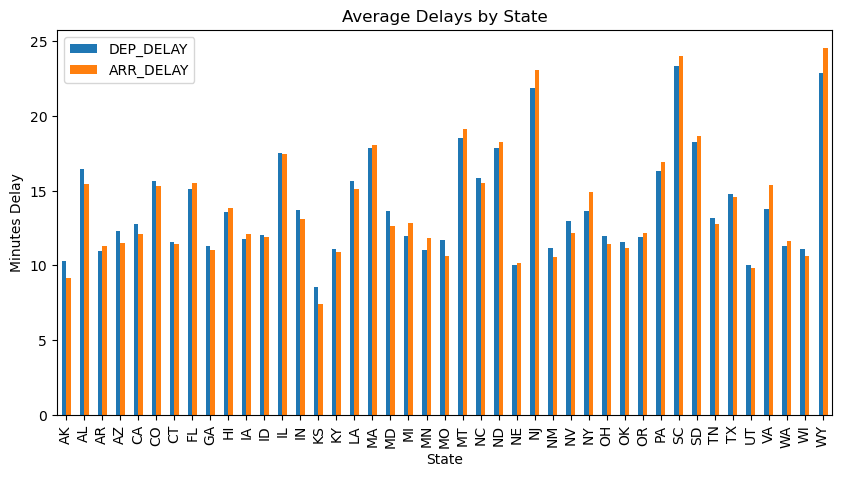

In [11]:
state_delays = df.groupby("ORIGIN_ST")[["DEP_DELAY", "ARR_DELAY"]].mean()
state_delays.plot(kind="bar", figsize=(10,5))
plt.title("Average Delays by State")
plt.ylabel("Minutes Delay")
plt.xlabel("State")
plt.show()


Question 4 Summary:
1. From the dataset, we identified two main delay patterns:
1.1 Some carriers consistently experience higher average delays.
Carriers like F9 (Frontier Airlines), YX (Republic Airways), and B6 (JetBlue Airways) had the highest average departure and arrival delays.
These airlines have a history of delays, potentially due to operational inefficiencies, scheduling congestion, or hub locations.
1.2 Delays are not uniform across all states and airports.
Some states (e.g., NV and CA) had slightly higher delays than others.
This could be due to busy airports (LAX, LAS, SFO), where congestion and air traffic volume contribute to longer delays.

2. Analysis of Minimum, Maximum, and Average Delays by Carrier
We analyzed the minimum, maximum, and average departure and arrival delays for each airline.
The top 10 airlines with the highest delays were visualized, showing that:
F9 (Frontier Airlines) had the highest average departure delay (~20 minutes).
AA (American Airlines) and UA (United Airlines) also had significant delays.
Some airlines had outlier max delays (e.g., 1769 minutes for B6), which could be due to cancellations, severe weather, or operational issues.

Over all: 
Frontier Airlines (F9) and Republic Airways (YX) are the most delay-prone carriers.
Major airport hubs (e.g., LAX, LAS) contribute to higher delays in CA and NV.
Delays are influenced by both the airline's operations and the airport's traffic load.

# Question 5:
1. Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".
2. For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines. 
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.

# Question 6:
Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

1. Indicate which airline operates the selected aircraft and where it often travels.
2. Arrival and departure delays at the airports where it traveled.
3. Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.
***Note: the TAIL_NUM can help you to identify each unique aircraft.

# Question 7:
Summarize the overall analysis and share THREE (3) key findings.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
